In [8]:
import plotlib as plib
import statsmodels.api as sm

In [9]:
def identity_line(ax=None, ls='--', *args, **kwargs):
    '''Draws identity line'''
    
    ax = ax or plt.gca()
    identity, = ax.plot([], [], ls=ls, *args, **kwargs)
    def callback(axes):
        low_x, high_x = ax.get_xlim()
        low_y, high_y = ax.get_ylim()
        low = min(low_x, low_y)
        high = max(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(ax)
    ax.callbacks.connect('xlim_changed', callback)
    ax.callbacks.connect('ylim_changed', callback)
    return ax

Read data

In [10]:
group = "Mammals"
ref = "Homo_sapiens"
data_dir = "../../"
incpg = pd.read_csv("{}/scripts/alphas/{}.{}.LM.tsv".format(data_dir, group, ref),sep="\t")
outcpg = pd.read_csv("{}/scripts/alphas/{}.{}.LM.CpGOut.tsv".format(data_dir, group, ref),sep="\t")

Plot and regression

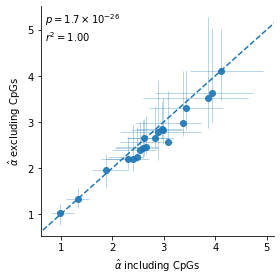

In [17]:
f,ax = plt.subplots(figsize=[4,4])

mut = "mod"

subdi = incpg[incpg.mut_type==mut]
subdo = outcpg[outcpg.mut_type==mut]
x = subdi.alpha
y = subdo.alpha

lm = sm.OLS(y, x)
lmFit = lm.fit()
lab = plib.make_pgls_legend(lam=None, pval=lmFit.pvalues['alpha'], r2=lmFit.rsquared)
ax.annotate(lab, xy=(0.02, 0.98), xycoords='axes fraction', verticalalignment='top')

ax.scatter(x, y, alpha=0.9,zorder=10)

ax.hlines(xmin=subdo.alpha_lwr, xmax=subdo.alpha_upr, y=subdo.alpha, linewidth=1, alpha=0.3)
ax.vlines(ymin=subdi.alpha_lwr, ymax=subdi.alpha_upr, x=subdi.alpha, linewidth=1, alpha=0.3)

ax.set_xlabel(r"$\hat{\alpha}$ including CpGs")
ax.set_ylabel(r"$\hat{\alpha}$ excluding CpGs")

identity_line()
sns.despine()
plt.tight_layout()

f.savefig("../pdfs/Figure_SX_CpGin_vs_out_mammals.pdf")